In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_excel("all_vacancies.xlsx")
df.head()

,id,name,company,city,key_skills,salary_from,salary_to,experience,schedule,alternate_url
0,117685242,Аналитик в практику Организационного консалтинга,RusPartners,Москва,"MS PowerPoint, Английский язык, Подготовка пре...",0.0,0.0,Нет опыта,Полный день,https://hh.ru/vacancy/117685242
1,117129644,Аналитик поддержки продукта Naumen Erudite,NAUMEN,Москва,NaN,0.0,0.0,От 1 года до 3 лет,Удаленная работа,https://hh.ru/vacancy/117129644
2,112418394,Системный аналитик (Стажер),Центр финансовых технологий,Владивосток,"Системный анализ, Бизнес-анализ, Аналитика",0.0,0.0,Нет опыта,Полный день,https://hh.ru/vacancy/112418394
3,117743231,Аналитик данных / Data Analyst,Saber Interactive,Санкт-Петербург,"SQL, Python, Clickhouse, Apache Airflow, Strea...",0.0,0.0,От 3 до 6 лет,Удаленная работа,https://hh.ru/vacancy/117743231
4,116150637,Бизнес-аналитик,Texnomart,Ташкент,NaN,0.0,0.0,От 1 года до 3 лет,Полный день,https://hh.ru/vacancy/116150637


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3150 non-null   int64  
 1   name           3150 non-null   object 
 2   company        3150 non-null   object 
 3   city           3150 non-null   object 
 4   key_skills     1946 non-null   object 
 5   salary_from    2972 non-null   float64
 6   salary_to      2521 non-null   float64
 7   experience     3150 non-null   object 
 8   schedule       3150 non-null   object 
 9   alternate_url  3150 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 246.2+ KB


In [60]:
missing_df = df.isna().sum()
missing_percentage = (missing_df/ len(df)) * 100

print("Пропуски в данных (количество):")
print(missing_df)
print("\nПропуски в данных (процент):")
print(missing_percentage)


Пропуски в данных (количество):
id                  0
name                0
company             0
city                0
key_skills       1204
salary_from       178
salary_to         629
experience          0
schedule            0
alternate_url       0
dtype: int64

Пропуски в данных (процент):
id                0.000000
name              0.000000
company           0.000000
city              0.000000
key_skills       38.222222
salary_from       5.650794
salary_to        19.968254
experience        0.000000
schedule          0.000000
alternate_url     0.000000
dtype: float64


•	id, name, company, city, experience, schedule, alternate_url — пропусков нет, так как эти поля заполнены для всех вакансий.

•	key_skills — есть пропуски, так как некоторые вакансии не содержат перечня навыков. Пропуски составляют около 38%. Причина - работодатели могли не заполнять этот раздел.

•	salary_from, salary_to — пропуски есть, так как в большинстве строк указаны 0.0, что фактически означает отсутствие данных о зарплате. Пропуски salary_from составляют около 6%,  salary_to около 20%. Причина - некоторые вакансии не указывают зарплату, либо указывают только минимальное или максимальное значение.


Обработка пропусков:


1. key_skills - заполняем пропуски значением "Не указано"

In [61]:
df['key_skills'] = df['key_skills'].fillna('Не указано')

2. salary_from, salary_to - заполним медианным значением, так как зарплаты могут варьироваться, и среднее значение может быть искажено выбросами

In [62]:
df['salary_from'].fillna(df['salary_from'].median(), inplace=True)
df['salary_to'].fillna(df['salary_to'].median(), inplace=True)

In [63]:
df.head()

,id,name,company,city,key_skills,salary_from,salary_to,experience,schedule,alternate_url
0,117685242,Аналитик в практику Организационного консалтинга,RusPartners,Москва,"MS PowerPoint, Английский язык, Подготовка пре...",0.0,0.0,Нет опыта,Полный день,https://hh.ru/vacancy/117685242
1,117129644,Аналитик поддержки продукта Naumen Erudite,NAUMEN,Москва,Не указано,0.0,0.0,От 1 года до 3 лет,Удаленная работа,https://hh.ru/vacancy/117129644
2,112418394,Системный аналитик (Стажер),Центр финансовых технологий,Владивосток,"Системный анализ, Бизнес-анализ, Аналитика",0.0,0.0,Нет опыта,Полный день,https://hh.ru/vacancy/112418394
3,117743231,Аналитик данных / Data Analyst,Saber Interactive,Санкт-Петербург,"SQL, Python, Clickhouse, Apache Airflow, Strea...",0.0,0.0,От 3 до 6 лет,Удаленная работа,https://hh.ru/vacancy/117743231
4,116150637,Бизнес-аналитик,Texnomart,Ташкент,Не указано,0.0,0.0,От 1 года до 3 лет,Полный день,https://hh.ru/vacancy/116150637


In [64]:
df.isnull().sum()

id               0
name             0
company          0
city             0
key_skills       0
salary_from      0
salary_to        0
experience       0
schedule         0
alternate_url    0
dtype: int64

In [65]:
df.dtypes

id                 int64
name              object
company           object
city              object
key_skills        object
salary_from      float64
salary_to        float64
experience        object
schedule          object
alternate_url     object
dtype: object

In [66]:
df.describe(include='all')

,id,name,company,city,key_skills,salary_from,salary_to,experience,schedule,alternate_url
count,3.150000e+03,3150,3150,3150,3150,3.150000e+03,3.150000e+03,3150,3150,3150
unique,NaN,1432,2085,159,1714,NaN,NaN,4,5,3150
top,NaN,Аналитик,СБЕР,Москва,Не указано,NaN,NaN,От 1 года до 3 лет,Полный день,https://hh.ru/vacancy/116482037
freq,NaN,301,35,1365,1204,NaN,NaN,1944,2126,1
mean,1.161982e+08,NaN,NaN,NaN,NaN,8.487568e+04,7.548350e+04,NaN,NaN,NaN
std,3.403096e+06,NaN,NaN,NaN,NaN,8.335118e+05,8.559405e+05,NaN,NaN,NaN
min,4.293277e+07,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,1.165267e+08,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN
50%,1.171005e+08,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN
75%,1.174814e+08,NaN,NaN,NaN,NaN,7.000000e+04,0.000000e+00,NaN,NaN,NaN


In [67]:
df.describe()

,id,salary_from,salary_to
count,3.150000e+03,3.150000e+03,3.150000e+03
mean,1.161982e+08,8.487568e+04,7.548350e+04
std,3.403096e+06,8.335118e+05,8.559405e+05
min,4.293277e+07,0.000000e+00,0.000000e+00
25%,1.165267e+08,0.000000e+00,0.000000e+00
50%,1.171005e+08,0.000000e+00,0.000000e+00
75%,1.174814e+08,7.000000e+04,0.000000e+00
max,1.178043e+08,2.760000e+07,3.500000e+07


In [68]:
df.describe(include=['object'])


,name,company,city,key_skills,experience,schedule,alternate_url
count,3150,3150,3150,3150,3150,3150,3150
unique,1432,2085,159,1714,4,5,3150
top,Аналитик,СБЕР,Москва,Не указано,От 1 года до 3 лет,Полный день,https://hh.ru/vacancy/116482037
freq,301,35,1365,1204,1944,2126,1


Анализ признаков: для числовых признаков — диапазон значений, для категориальных — уникальные значения.

In [70]:
for col in df.select_dtypes(include=['number']).columns:
    print(f"{col}: {df[col].min()} - {df[col].max()}")

for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")


id: 42932768 - 117804309
salary_from: 0.0 - 27600000.0
salary_to: 0.0 - 35000000.0
name: ['Аналитик в практику Организационного консалтинга'
 'Аналитик поддержки продукта Naumen Erudite'
 'Системный аналитик (Стажер)' ... 'Data / BI Analyst'
 'Аналитик на маркетплейс Wildberries'
 'Junior System Analyst/ Младший системный аналитик в CRM проекты']
company: ['RusPartners' 'NAUMEN' 'Центр финансовых технологий' ...
 'Институт международных экономических связей' 'MI-MAG' 'Вертекс']
city: ['Москва' 'Владивосток' 'Санкт-Петербург' 'Ташкент' 'Екатеринбург'
 'Краснодар' 'Нижний Новгород' 'Ростов-на-Дону' 'Шымкент' 'Астана'
 'Новосибирск' 'Кемерово' 'Мытищи (Московская область)' 'Алматы'
 'Одинцово (Московская область)' 'Севастополь' 'Темиртау'
 'Подольск (Московская область)' 'Воронеж' 'Красноярск' 'Обнинск'
 'Ярославль' 'Симферополь' 'Казань' 'Минск' 'Тбилиси' 'Томск' 'Ставрополь'
 'Сербия' 'Южно-Сахалинск' 'Калининград' 'Иркутск' 'Пермь' 'Ковров'
 'Самара' 'Волжский (Волгоградская область)' 

In [79]:
df_original = df.copy()

def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_salary_from = detect_outliers('salary_from')
outliers_salary_to = detect_outliers('salary_to')

df_cleaned = df[~df.index.isin(outliers_salary_from.index)]
df_cleaned = df_cleaned[~df_cleaned.index.isin(outliers_salary_to.index)]

In [80]:
print(f"Выбросы в salary_from: {len(outliers_salary_from)}")
print(f"Выбросы в salary_to: {len(outliers_salary_to)}")

Выбросы в salary_from: 147
Выбросы в salary_to: 196


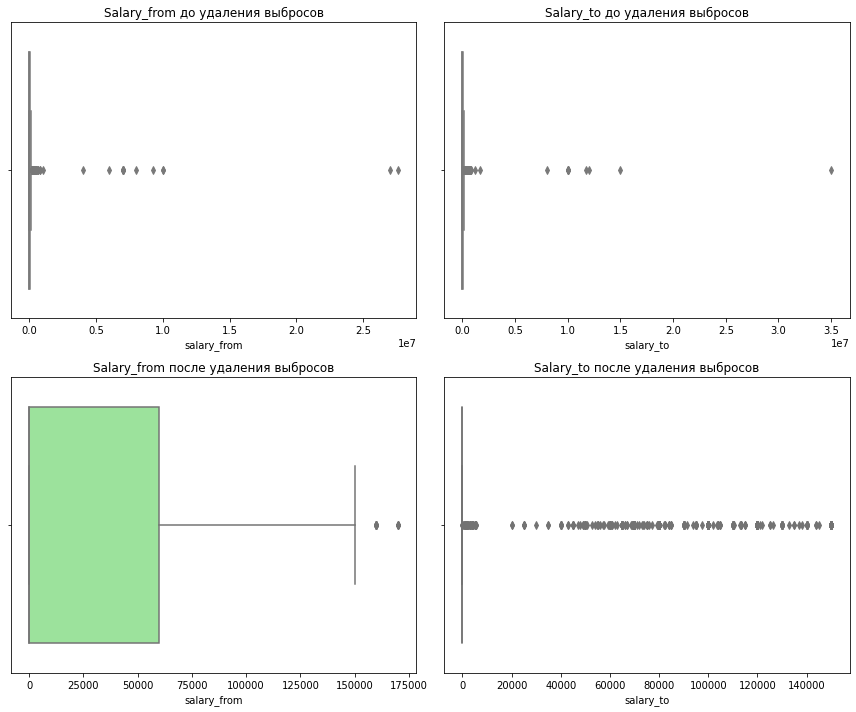

In [82]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x=df_original['salary_from'], ax=axes[0, 0], color='lightblue')
axes[0, 0].set_title('Salary_from до удаления выбросов')

sns.boxplot(x=df_original['salary_to'], ax=axes[0, 1], color='lightblue')
axes[0, 1].set_title('Salary_to до удаления выбросов')

sns.boxplot(x=df_cleaned['salary_from'], ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Salary_from после удаления выбросов')

sns.boxplot(x=df_cleaned['salary_to'], ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Salary_to после удаления выбросов')

plt.tight_layout()
plt.show()

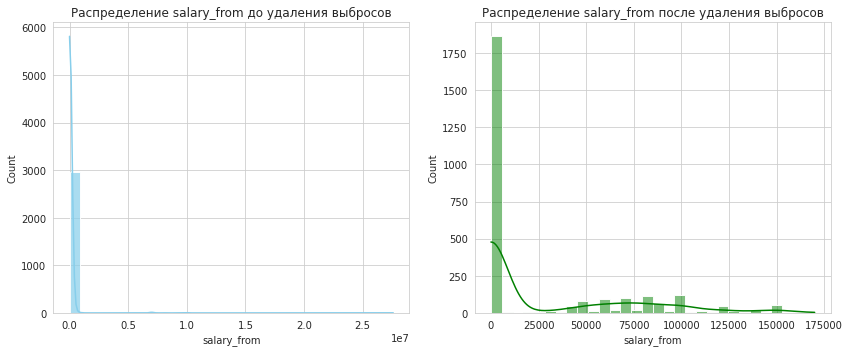

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_original['salary_from'], bins=30, kde=True, ax=axes[0], color='skyblue', alpha=0.7)
axes[0].set_title('Распределение salary_from до удаления выбросов')

sns.histplot(df_cleaned['salary_from'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Распределение salary_from после удаления выбросов')

plt.tight_layout()
plt.show()

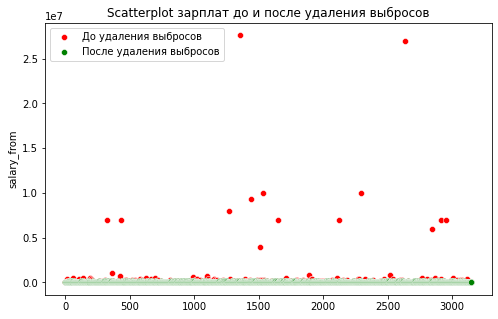

In [84]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_original.index, y=df_original['salary_from'], color='red', label='До удаления выбросов')
sns.scatterplot(x=df_cleaned.index, y=df_cleaned['salary_from'], color='green', label='После удаления выбросов')
plt.legend()
plt.title('Scatterplot зарплат до и после удаления выбросов')
plt.show()

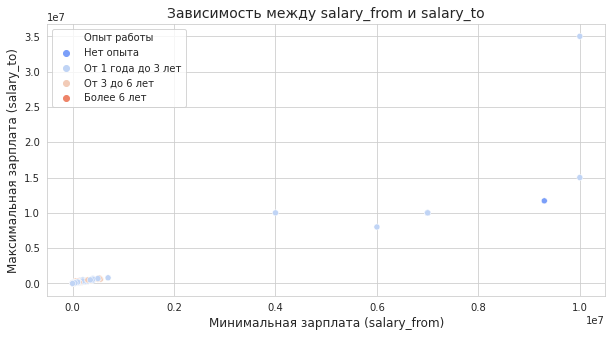

In [94]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='salary_from', y='salary_to', hue='experience', palette='coolwarm')
plt.title('Зависимость между salary_from и salary_to', fontsize=14)
plt.xlabel('Минимальная зарплата (salary_from)', fontsize=12)
plt.ylabel('Максимальная зарплата (salary_to)', fontsize=12)
plt.legend(title="Опыт работы")
plt.show()

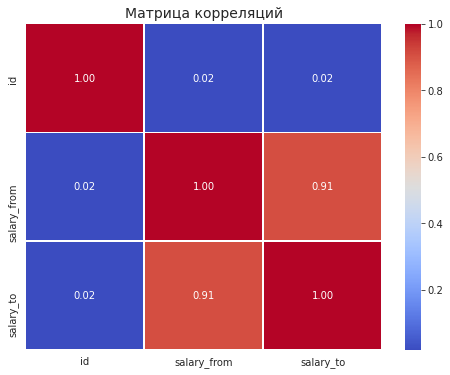

In [95]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Матрица корреляций', fontsize=14)
plt.show()


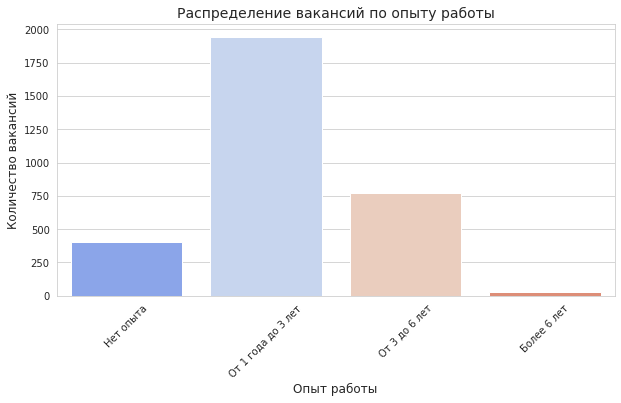

In [97]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='experience', palette='coolwarm')
plt.title('Распределение вакансий по опыту работы', fontsize=14)
plt.xlabel('Опыт работы', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xticks(rotation=45)
plt.show()


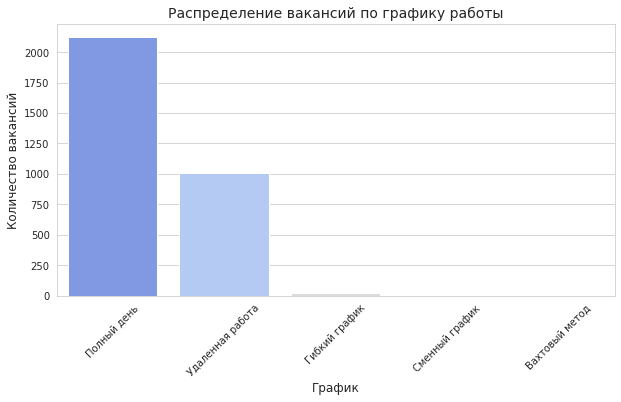

In [112]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='schedule', palette='coolwarm')
plt.title('Распределение вакансий по графику работы', fontsize=14)
plt.xlabel('График', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xticks(rotation=45)
plt.show()

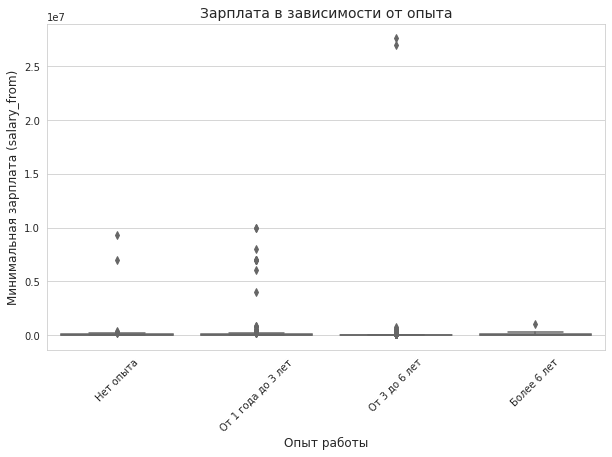

In [98]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience', y='salary_from', palette='coolwarm')
plt.title('Зарплата в зависимости от опыта', fontsize=14)
plt.xlabel('Опыт работы', fontsize=12)
plt.ylabel('Минимальная зарплата (salary_from)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


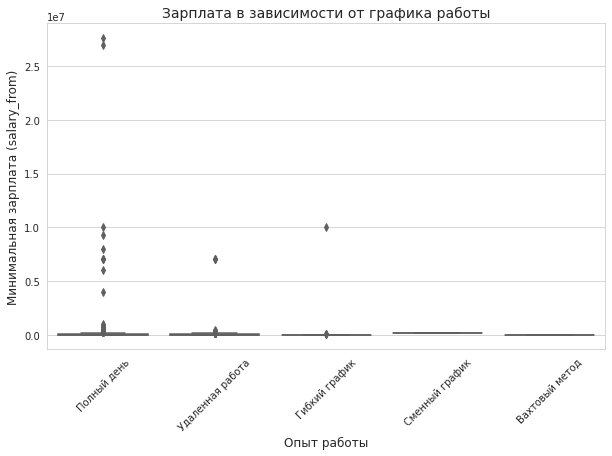

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='schedule', y='salary_from', palette='coolwarm')
plt.title('Зарплата в зависимости от графика работы', fontsize=14)
plt.xlabel('Опыт работы', fontsize=12)
plt.ylabel('Минимальная зарплата (salary_from)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


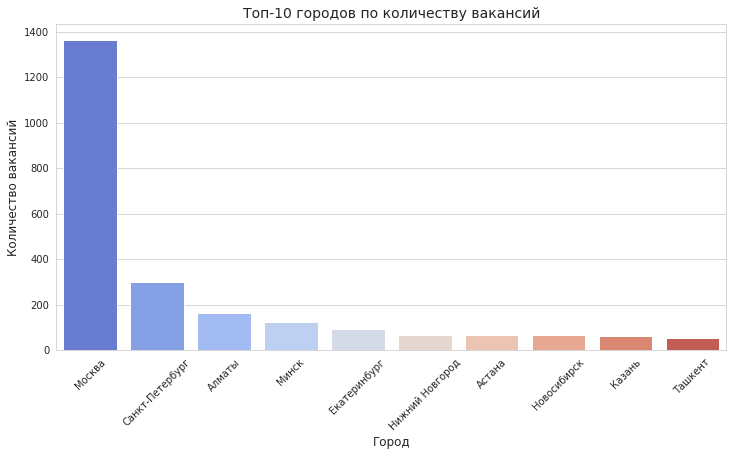

In [102]:
plt.figure(figsize=(12, 6))
top_cities = df['city'].value_counts().head(10) 

sns.barplot(x=top_cities.index, y=top_cities.values, palette="coolwarm")
plt.title('Топ-10 городов по количеству вакансий', fontsize=14)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xticks(rotation=45)
plt.show()

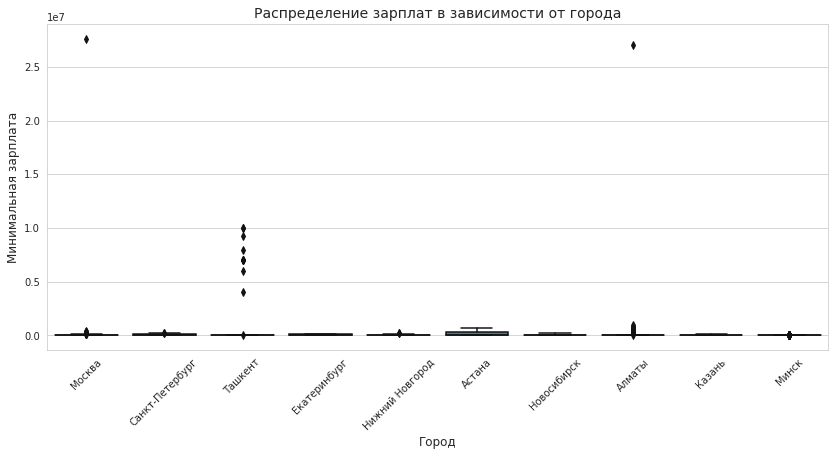

In [103]:
plt.figure(figsize=(14, 6))
top_cities_list = top_cities.index.tolist()  
df_top_cities = df[df['city'].isin(top_cities_list)] 

sns.boxplot(data=df_top_cities, x='city', y='salary_from', palette="mako")
plt.title('Распределение зарплат в зависимости от города', fontsize=14)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Минимальная зарплата', fontsize=12)
plt.xticks(rotation=45)
plt.show()

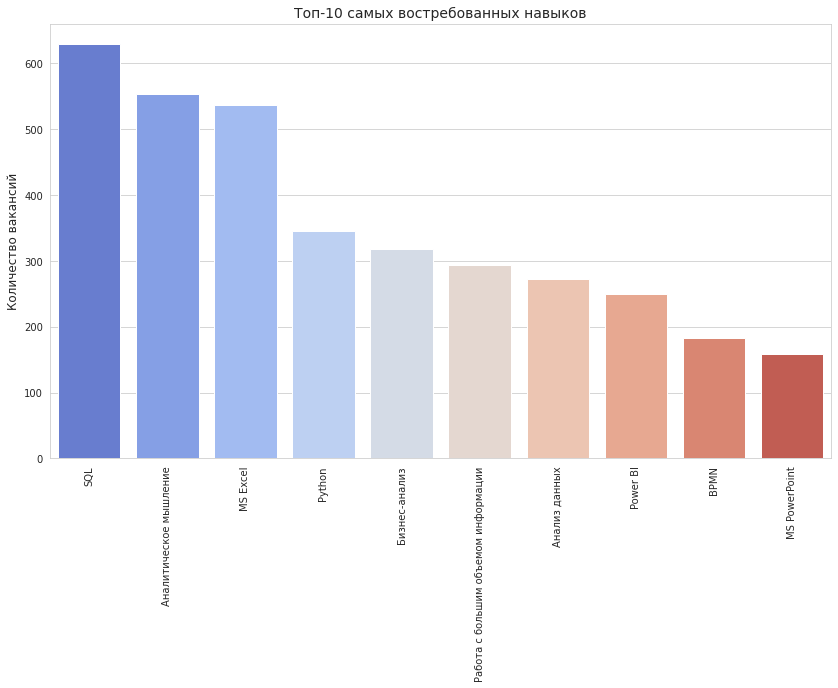

In [135]:
skills_series = df['key_skills'].str.split(',').explode().str.strip()

skills_series = skills_series[skills_series != "Не указано"]

top_skills = skills_series.value_counts().head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_skills.index, y=top_skills.values, palette="coolwarm")
plt.title('Топ-10 самых востребованных навыков', fontsize=14)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xticks(rotation=90, fontsize=10)

plt.show()

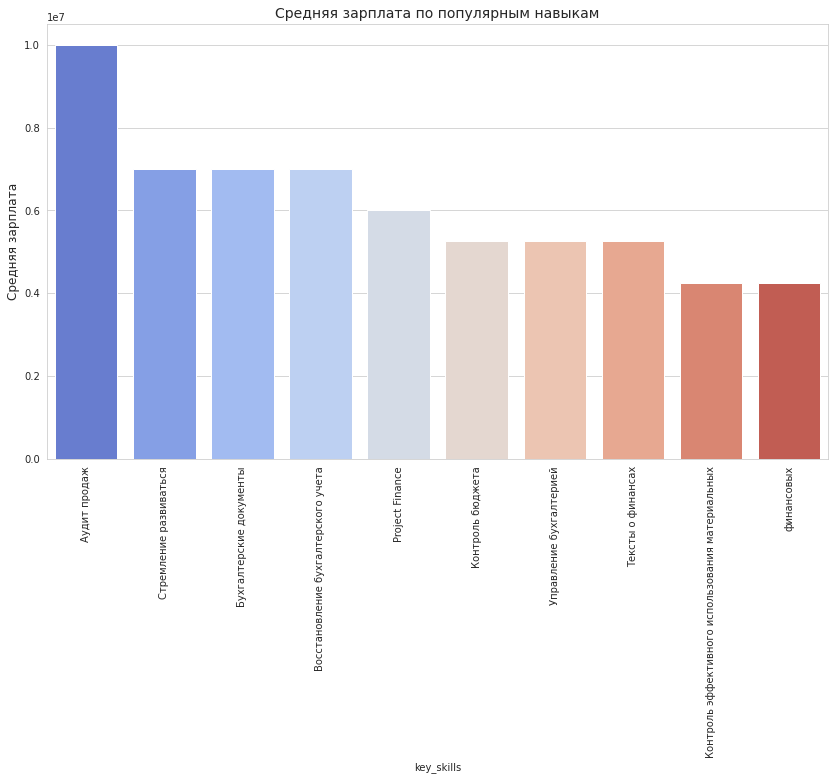

In [136]:
df_skills_salary = df[['key_skills', 'salary_from']].copy()
df_skills_salary = df_skills_salary.dropna()  

df_skills_salary['key_skills'] = df_skills_salary['key_skills'].str.split(',')
df_skills_salary = df_skills_salary.explode('key_skills')
df_skills_salary['key_skills'] = df_skills_salary['key_skills'].str.strip() 

df_skills_salary = df_skills_salary[df_skills_salary['key_skills'] != "Не указано"]

average_salary_per_skill = df_skills_salary.groupby('key_skills')['salary_from'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=average_salary_per_skill.index, y=average_salary_per_skill.values, palette="coolwarm")
plt.title('Средняя зарплата по популярным навыкам', fontsize=14)
plt.ylabel('Средняя зарплата', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.show()


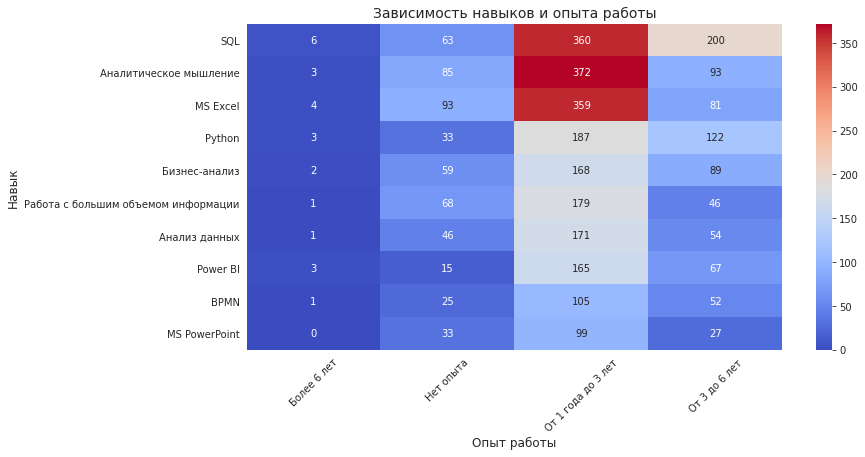

In [132]:
df_skills_experience = df[['key_skills', 'experience']].copy() # Убираем пропущенные значения

df_skills_experience['key_skills'] = df_skills_experience['key_skills'].str.split(',')
df_skills_experience = df_skills_experience.explode('key_skills')
df_skills_experience['key_skills'] = df_skills_experience['key_skills'].str.strip()

df_skills_experience = df_skills_experience[df_skills_experience['key_skills'] != "Не указано"]

skills_experience_pivot = df_skills_experience.pivot_table(index='key_skills', columns='experience', aggfunc='size', fill_value=0)

top_skills_list = top_skills.index.tolist()
skills_experience_pivot = skills_experience_pivot.loc[top_skills_list]

plt.figure(figsize=(12, 6))
sns.heatmap(skills_experience_pivot, cmap="coolwarm", annot=True, fmt='d')
plt.title('Зависимость навыков и опыта работы', fontsize=14)
plt.xlabel('Опыт работы', fontsize=12)
plt.ylabel('Навык', fontsize=12)
plt.xticks(rotation=45)
plt.show()


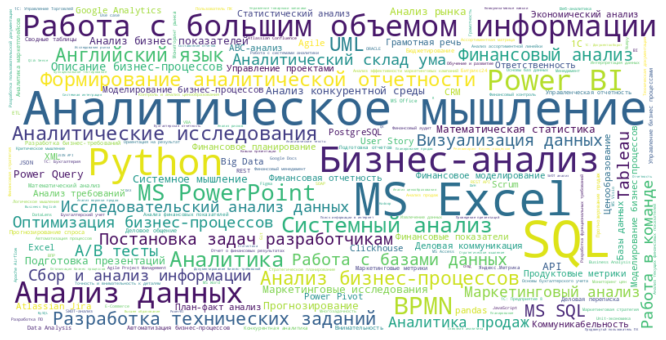

In [140]:
from wordcloud import WordCloud

skills_list = df['key_skills'].str.split(', ').explode().dropna()

# Создаем словарь частот
skills_counts = Counter(skills_list)

# Создаем Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(skills_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

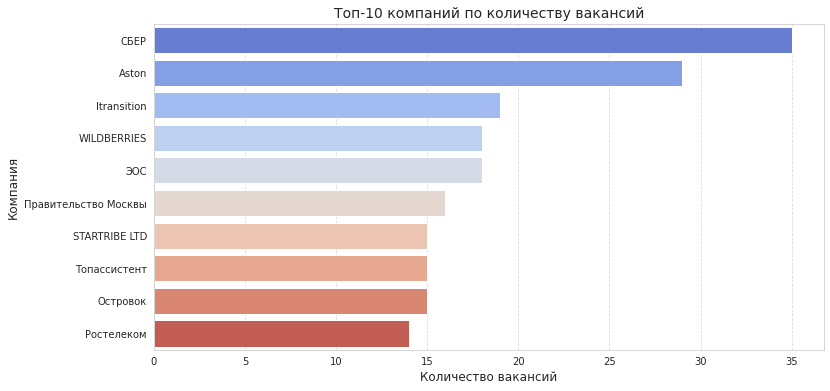

In [142]:
company_counts = df['company'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=company_counts.values, y=company_counts.index, palette='coolwarm')
plt.title('Топ-10 компаний по количеству вакансий', fontsize=14)
plt.xlabel('Количество вакансий', fontsize=12)
plt.ylabel('Компания', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='x')
plt.show()

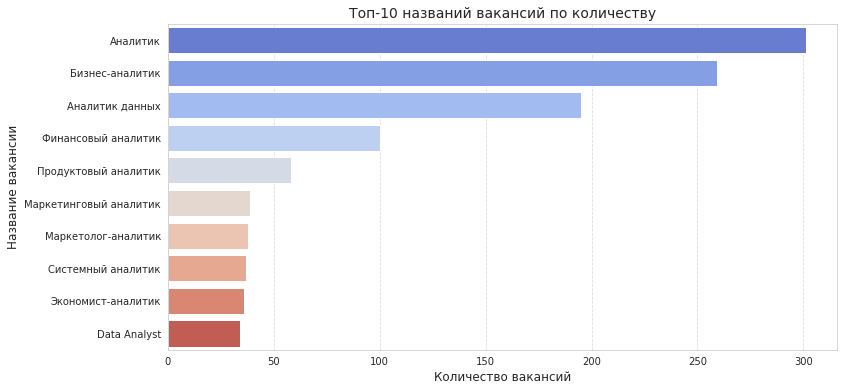

In [143]:
name_counts = df['name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=name_counts.values, y=name_counts.index, palette='coolwarm')
plt.title('Топ-10 названий вакансий по количеству', fontsize=14)
plt.xlabel('Количество вакансий', fontsize=12)
plt.ylabel('Название вакансии', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='x')
plt.show()

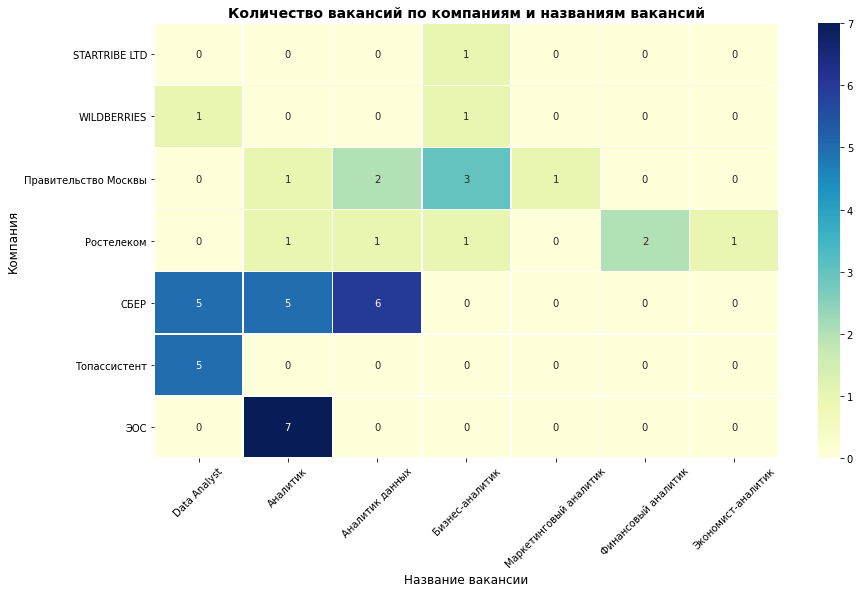

In [39]:
pivot_table_company_name = pd.pivot_table(df[df['company'].isin(top_companies) & df['name'].isin(top_names)], 
                                          index='company', columns='name', values='id', aggfunc='count', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table_company_name, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)
plt.title('Количество вакансий по компаниям и названиям вакансий', fontsize=14, fontweight='bold')
plt.xlabel('Название вакансии', fontsize=12)
plt.ylabel('Компания', fontsize=12)
plt.xticks(rotation=45)
plt.show()

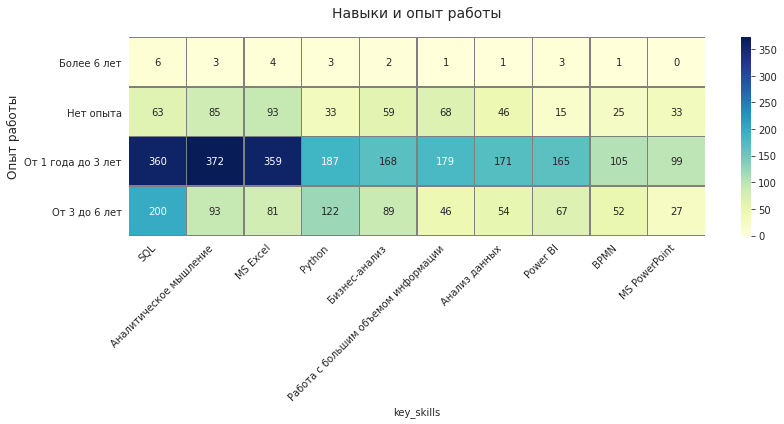

In [163]:
skills_expanded = df.assign(key_skills=df['key_skills'].str.split(', ')).explode('key_skills')

pivot_table_1 = pd.pivot_table(skills_expanded, 
                               index='experience', 
                               columns='key_skills', 
                               values='id', 
                               aggfunc='count', 
                               fill_value=0)


top_skills = skills_expanded['key_skills'].value_counts().head(10).index
pivot_table_1_filtered = pivot_table_1[top_skills]

# Визуализация таблицы с тепловой картой
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table_1_filtered, annot=True, fmt='d', cmap='YlGnBu', cbar=True, 
            linewidths=0.5, linecolor='gray')
plt.title('Навыки и опыт работы', fontsize=14, pad=20)
plt.ylabel('Опыт работы', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

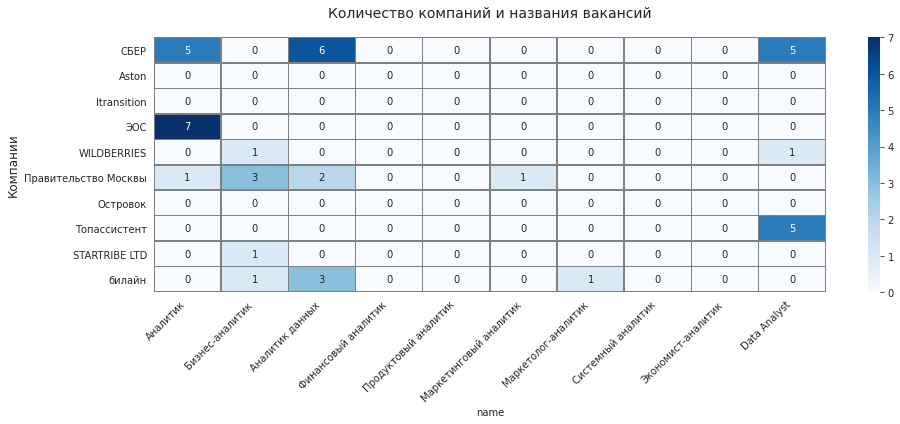

In [165]:
pivot_table_2 = pd.pivot_table(df, 
                               index='company', 
                               columns='name', 
                               values='id', 
                               aggfunc='count', 
                               fill_value=0)

pivot_table_2['Total'] = pivot_table_2.sum(axis=1)
pivot_table_2 = pivot_table_2.sort_values(by='Total', ascending=False).drop(columns='Total')
pivot_table_2_filtered = pivot_table_2.head(10)

top_vacancies = df['name'].value_counts().head(10).index
pivot_table_2_filtered = pivot_table_2_filtered[top_vacancies]

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table_2_filtered, annot=True, fmt='d', cmap='Blues', cbar=True, 
            linewidths=0.5, linecolor='gray')
plt.title('Количество компаний и названия вакансий', fontsize=14, pad=20)
plt.ylabel('Компании', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


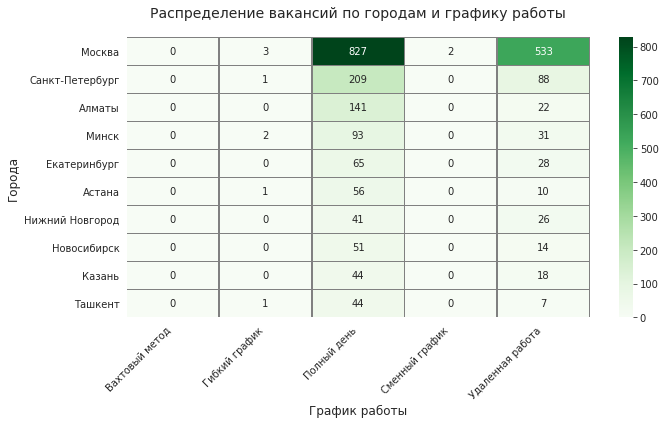

In [167]:
pivot_table_3 = pd.pivot_table(df, 
                               index='city', 
                               columns='schedule', 
                               values='id', 
                               aggfunc='count', 
                               fill_value=0)

pivot_table_3['Total'] = pivot_table_3.sum(axis=1)
pivot_table_3 = pivot_table_3.sort_values(by='Total', ascending=False).drop(columns='Total')
pivot_table_3_filtered = pivot_table_3.head(10)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_3_filtered, annot=True, fmt='d', cmap='Greens', cbar=True, 
            linewidths=0.5, linecolor='gray')
plt.title('Распределение вакансий по городам и графику работы', fontsize=14, pad=20)
plt.xlabel('График работы', fontsize=12)
plt.ylabel('Города', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('pivot_table_3.png', dpi=300)
plt.show()

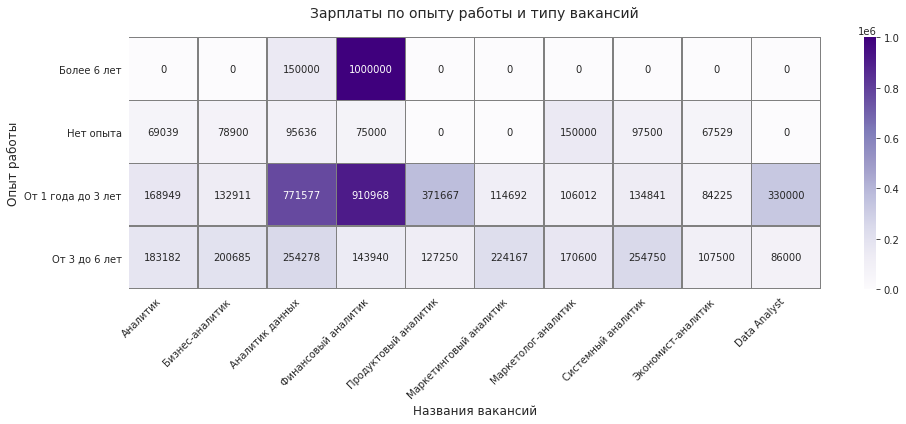

In [169]:
salary_df = df[(df['salary_from'] > 0) | (df['salary_to'] > 0)].copy()
salary_df['avg_salary'] = salary_df[['salary_from', 'salary_to']].mean(axis=1)

pivot_table_4 = pd.pivot_table(salary_df, 
                               index='experience', 
                               columns='name', 
                               values='avg_salary', 
                               aggfunc='mean', 
                               fill_value=0)

pivot_table_4_filtered = pivot_table_4[top_vacancies]

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table_4_filtered, annot=True, fmt='.0f', cmap='Purples', cbar=True, 
            linewidths=0.5, linecolor='gray')
plt.title('Зарплаты по опыту работы и типу вакансий', fontsize=14, pad=20)
plt.xlabel('Названия вакансий', fontsize=12)
plt.ylabel('Опыт работы', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('pivot_table_4.png', dpi=300)
plt.show()